In [2]:
# imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append("..")
import helpers as h
# read in the files from data directory

left_file_path_1 = "../../shared_data/hifim/sub_2/5_springs/5-springs_Left-Ankle.csv"
right_file_path_1 = "../../shared_data/hifim/sub_2/5_springs/5-springs_Right-Ankle.csv"

left_file_path_2 = "../../shared_data/hifim/sub_2/earth_jump/jump-earth_Left-Ankle.csv"
right_file_path_2 = "../../shared_data/hifim/sub_2/earth_jump/jump-earth_Right-Ankle.csv"

# reads the csv into a pandas data frame
left_data_1 = pd.read_csv(left_file_path_1)
right_data_1 = pd.read_csv(right_file_path_1)

left_data_2 = pd.read_csv(left_file_path_2)
right_data_2 = pd.read_csv(right_file_path_2)

In [2]:
# left
l_pc_1 =  left_data_1["PacketCounter"]
l_a_x_1 = left_data_1["Acc_X"]
l_a_y_1 = left_data_1["Acc_Y"]
l_a_z_1 = left_data_1["Acc_Z"]

# right
r_pc_1 =  right_data_1["PacketCounter"]
r_a_x_1 = right_data_1["Acc_X"]
r_a_y_1 = right_data_1["Acc_Y"]
r_a_z_1 = right_data_1["Acc_Z"]

# left
l_pc_2 =  left_data_2["PacketCounter"]
l_a_x_2 = left_data_2["Acc_X"]
l_a_y_2 = left_data_2["Acc_Y"]
l_a_z_2 = left_data_2["Acc_Z"]

# right
r_pc_2 =  right_data_2["PacketCounter"]
r_a_x_2 = right_data_2["Acc_X"]
r_a_y_2 = right_data_2["Acc_Y"]
r_a_z_2 = right_data_2["Acc_Z"]

In [3]:
g = 9.80665
l_a_x_norm_1 = l_a_x_1.to_numpy()  / g
l_a_y_norm_1 = l_a_y_1.to_numpy()  / g
l_a_z_norm_1 = l_a_z_1.to_numpy()  / g

r_a_x_norm_1 = r_a_x_1.to_numpy()  / g
r_a_y_norm_1 = r_a_y_1.to_numpy()  / g
r_a_z_norm_1 = r_a_z_1.to_numpy()  / g

l_a_x_norm_2 = l_a_x_2.to_numpy()  / g
l_a_y_norm_2 = l_a_y_2.to_numpy()  / g
l_a_z_norm_2 = l_a_z_2.to_numpy()  / g

r_a_x_norm_2 = r_a_x_2.to_numpy()  / g
r_a_y_norm_2 = r_a_y_2.to_numpy()  / g
r_a_z_norm_2 = r_a_z_2.to_numpy()  / g

In [4]:
sampling_rate = 60
window_period = 5
window = sampling_rate * window_period
lc_off = 0.1
hc_off = 10
filter_order = 6
filter_type = "bandpass"
g_level = 9.80665

b,a = h.build_filter((lc_off, hc_off), sampling_rate, filter_type, filter_order)

# this is the machine
l_filtered_mag_1 = h.filter_signal(b,a, l_a_x_norm_1, "filtfilt")
r_filtered_mag_1 = h.filter_signal(b,a, r_a_x_norm_1, "filtfilt")

# this is earth
l_filtered_mag_2 = h.filter_signal(b,a, l_a_x_norm_2, "filtfilt")
r_filtered_mag_2 = h.filter_signal(b,a, r_a_x_norm_2, "filtfilt")

In [5]:
# frequency response
l_fft_1 = h.compute_fft_mag(l_filtered_mag_1)
l_fft_graph_1 = h.fft_graph_values(l_fft_1, sampling_rate)

r_fft_1 = h.compute_fft_mag(r_filtered_mag_1)
r_fft_graph_1 = h.fft_graph_values(r_fft_1, sampling_rate)

l_fft_2 = h.compute_fft_mag(l_filtered_mag_2)
l_fft_graph_2 = h.fft_graph_values(l_fft_2, sampling_rate)

r_fft_2 = h.compute_fft_mag(r_filtered_mag_2)
r_fft_graph_2 = h.fft_graph_values(r_fft_2, sampling_rate)

(0.0, 0.6)

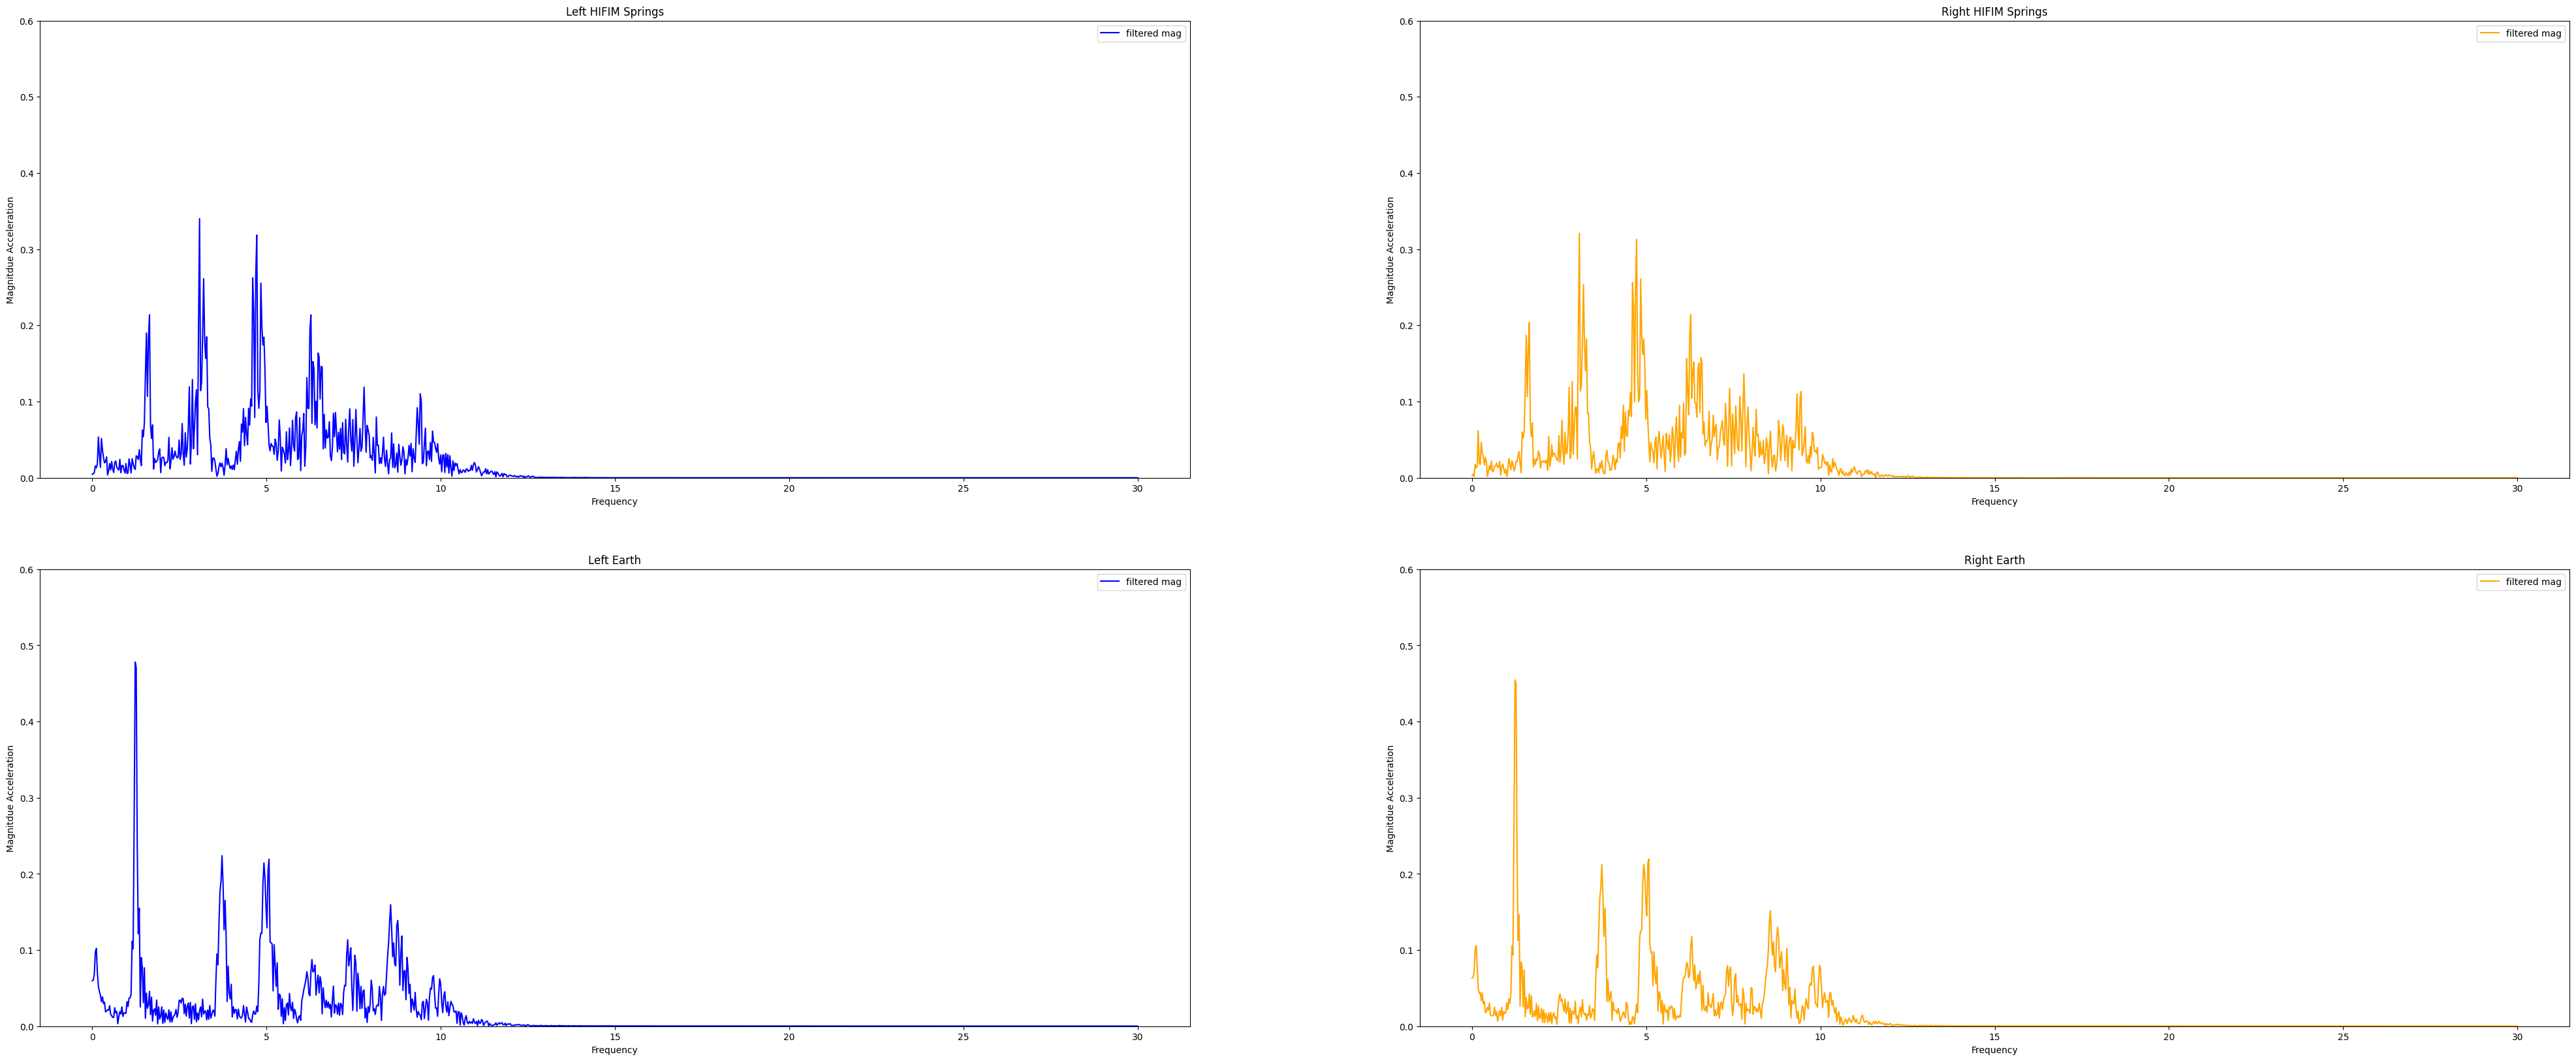

In [6]:
fig, ax = plt.subplots(2,2, figsize=(50, 20))

# Add labels, title, and legend
ax[0][0].plot(l_fft_graph_1[0], l_fft_graph_1[1], color="blue", label="filtered mag")
ax[0][0].set_xlabel('Frequency')
ax[0][0].set_ylabel('Magnitdue Acceleration')
ax[0][0].set_title('Left HIFIM Springs')
ax[0][0].legend()
ax[0][0].set_ylim(0,0.6)

ax[0][1].plot(r_fft_graph_1[0], r_fft_graph_1[1], color="orange", label="filtered mag")
ax[0][1].set_xlabel('Frequency')
ax[0][1].set_ylabel('Magnitdue Acceleration')
ax[0][1].set_title('Right HIFIM Springs')
ax[0][1].legend()
ax[0][1].set_ylim(0,0.6)

# Add labels, title, and legend
ax[1][0].plot(l_fft_graph_2[0], l_fft_graph_2[1], color="blue", label="filtered mag")
ax[1][0].set_xlabel('Frequency')
ax[1][0].set_ylabel('Magnitdue Acceleration')
ax[1][0].set_title('Left Earth')
ax[1][0].legend()
ax[1][0].set_ylim(0,0.6)

ax[1][1].plot(r_fft_graph_2[0], r_fft_graph_2[1], color="orange", label="filtered mag")
ax[1][1].set_xlabel('Frequency')
ax[1][1].set_ylabel('Magnitdue Acceleration')
ax[1][1].set_title('Right Earth')
ax[1][1].legend()
ax[1][1].set_ylim(0,0.6)

In [80]:
# left
l_pc_1 =  left_data_1["PacketCounter"]
l_a_x_1 = left_data_1["Acc_X"]
l_a_y_1 = left_data_1["Acc_Y"]
l_a_z_1 = left_data_1["Acc_Z"]

# right
r_pc_1 =  right_data_1["PacketCounter"]
r_a_x_1 = right_data_1["Acc_X"]
r_a_y_1 = right_data_1["Acc_Y"]
r_a_z_1 = right_data_1["Acc_Z"]

# left
l_pc_2 =  left_data_2["PacketCounter"]
l_a_x_2 = left_data_2["Acc_X"]
l_a_y_2 = left_data_2["Acc_Y"]
l_a_z_2 = left_data_2["Acc_Z"]

# right
r_pc_2 =  right_data_2["PacketCounter"]
r_a_x_2 = right_data_2["Acc_X"]
r_a_y_2 = right_data_2["Acc_Y"]
r_a_z_2 = right_data_2["Acc_Z"]

In [81]:
# compute the loading intensity in 5 seconds windows
# compute_skeletal_loading_in_windows(accel_x, accel_y, accel_z, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)
left_li_1 = h.compute_skeletal_loading_in_windows(l_a_x_1, l_a_y_1, l_a_z_1, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)
right_li_1 = h.compute_skeletal_loading_in_windows(r_a_x_1, r_a_y_1, r_a_z_1, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)

# compute the loading intensity in 5 seconds windows

left_li_2 = h.compute_skeletal_loading_in_windows(l_a_x_2, l_a_y_2, l_a_z_2, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)
right_li_2 = h.compute_skeletal_loading_in_windows(r_a_x_2, r_a_y_2, r_a_z_2, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)

left_li_1_avg = round(np.mean(left_li_1),2)
right_li_1_avg = round(np.mean(right_li_1),2)

left_li_2_avg = round(np.mean(left_li_2),2)
right_li_2_avg = round(np.mean(right_li_2),2)


HIFIM Springs average loading intenity: Left:34.42 Right: 34.88

Earth average loading intenity: Left:24.84 Right: 24.18


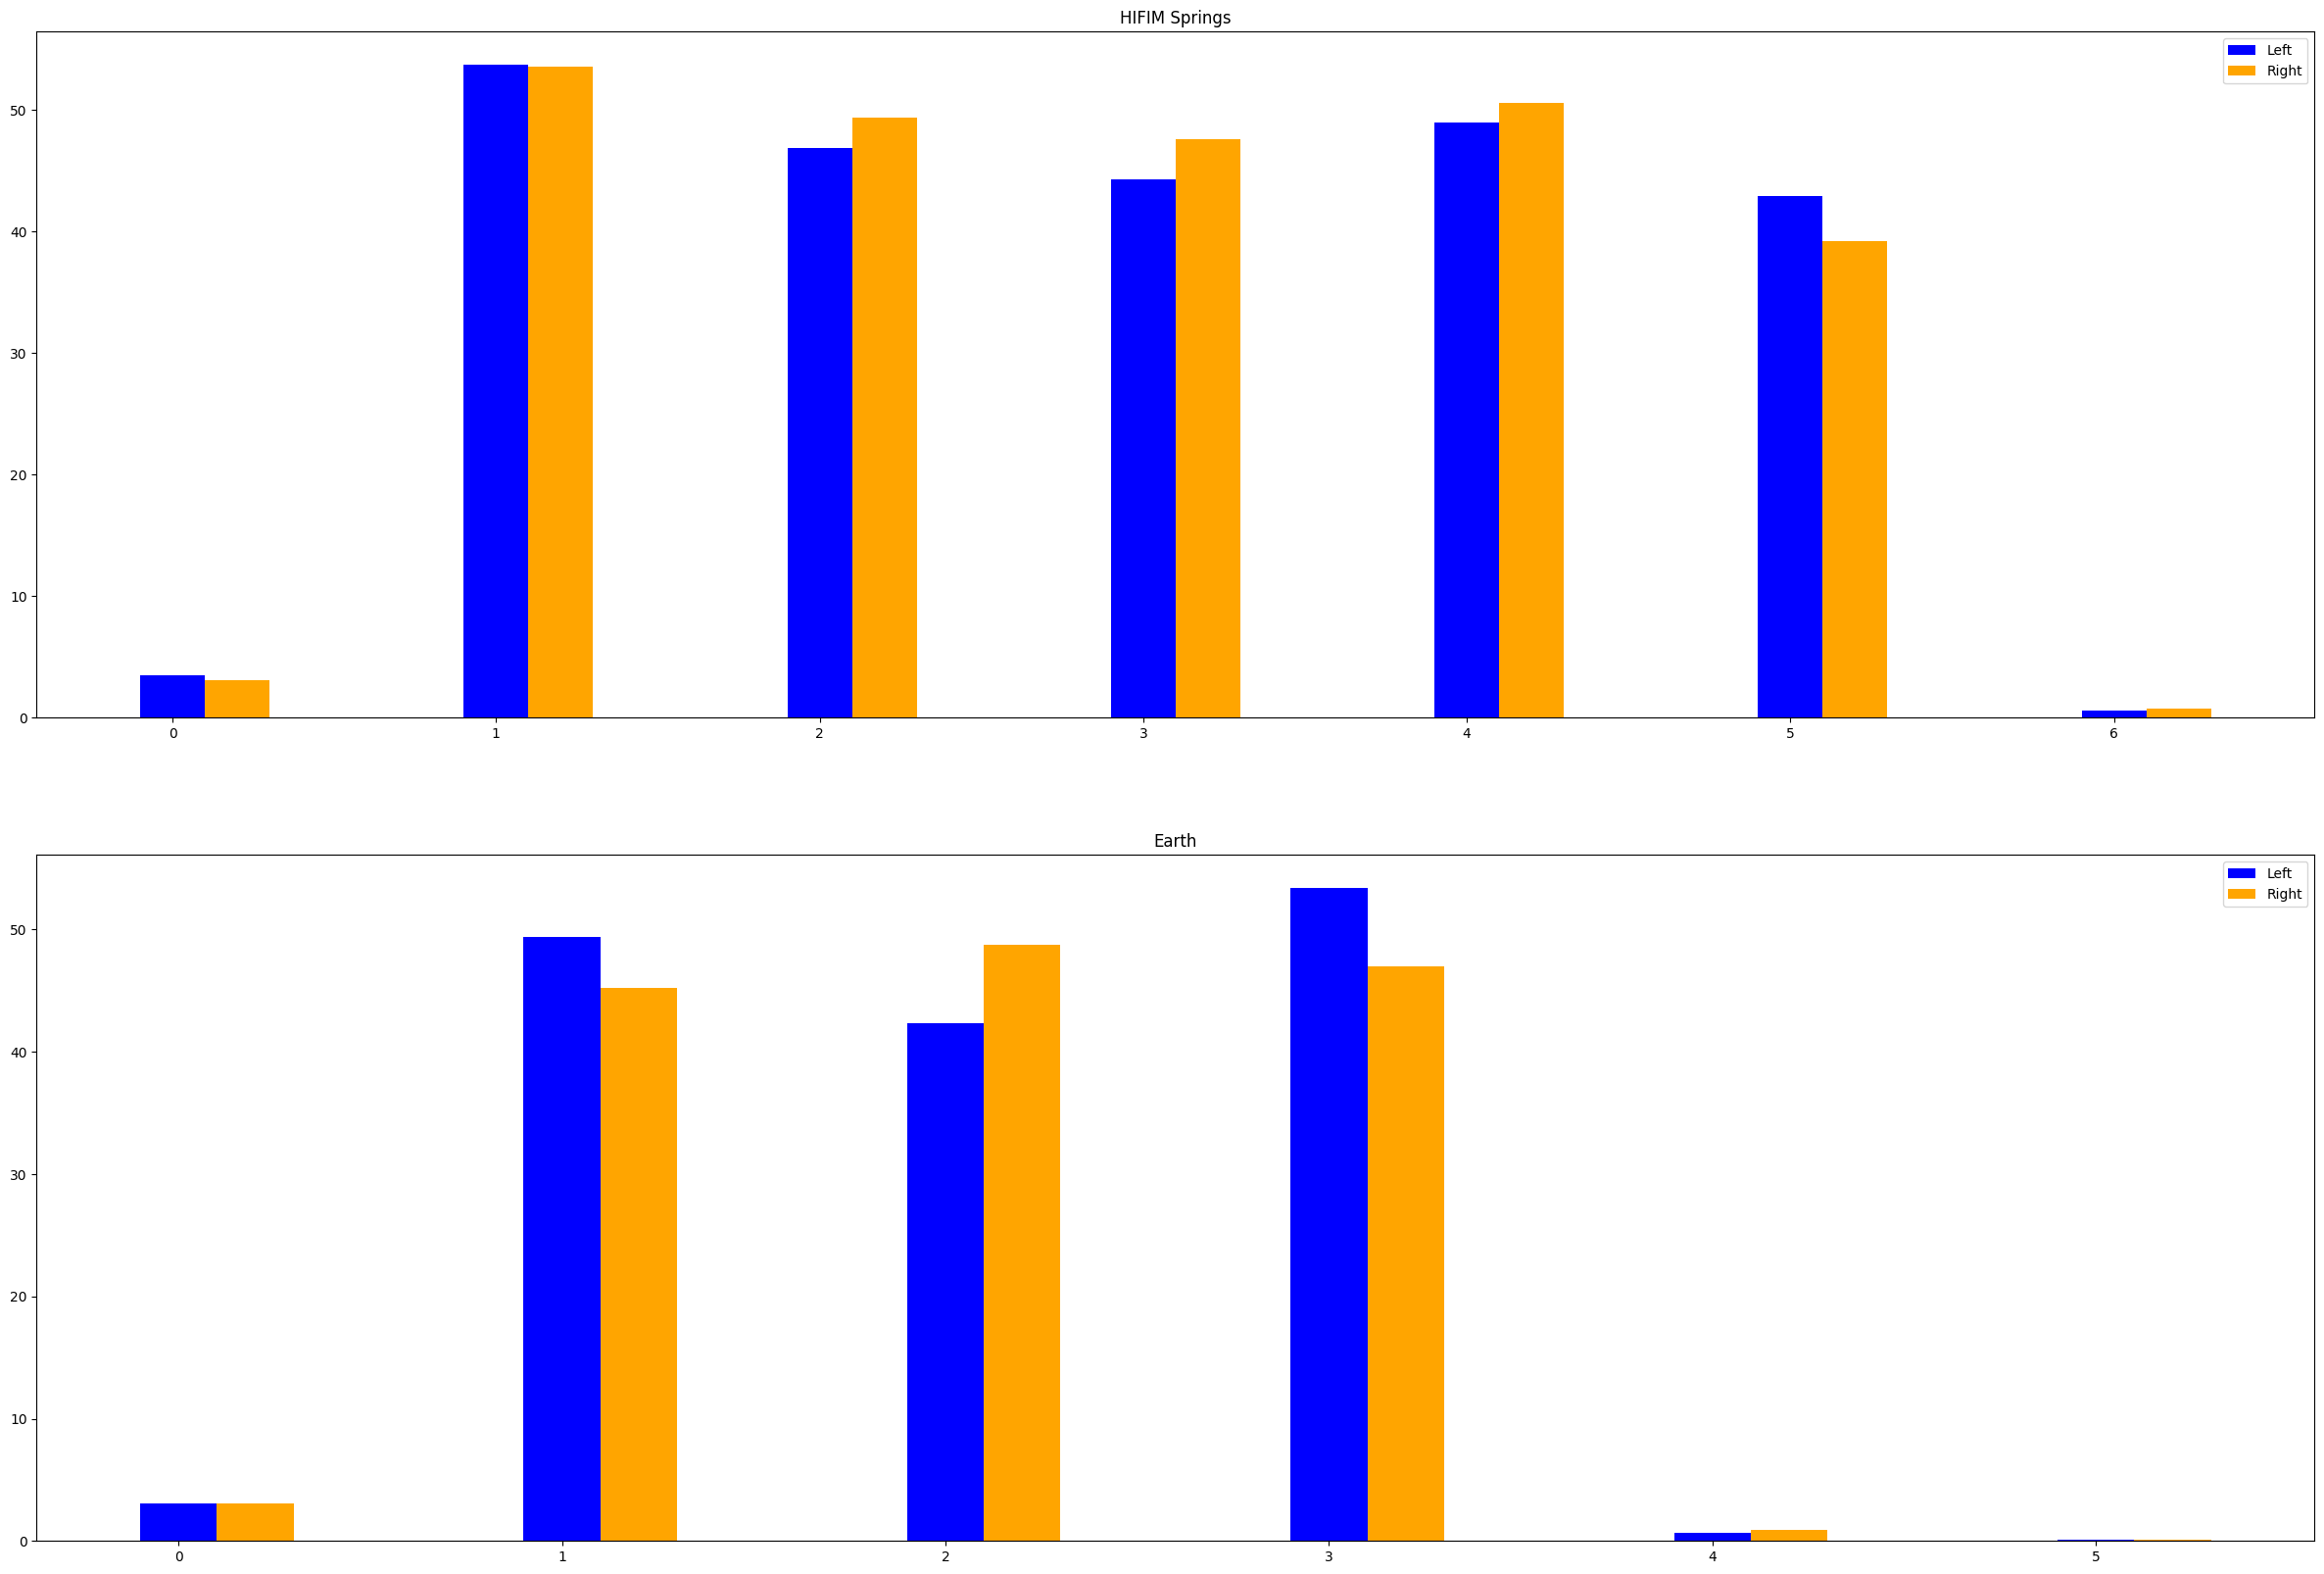

In [72]:

print()
print(f"HIFIM Springs average loading intenity: Left:{left_li_1_avg} Right: {right_li_1_avg}")
print()
print(f"Earth average loading intenity: Left:{left_li_2_avg} Right: {right_li_2_avg}")

# plot 
fig, ax = plt.subplots(2,1, figsize=(30, 20))

# time index
l_index_1 = [i for i in range(len(right_li_1))]
r_index_1 = [i + 0.2 for i in range(len(left_li_1))]

l_index_2 = [i for i in range(len(right_li_2))]
r_index_2 = [i + 0.2 for i in range(len(left_li_2))]

ax[0].bar(l_index_1, left_li_1,   0.2,  color="blue", label="Left" )
ax[0].bar(r_index_1, right_li_1,  0.2, color="orange", label="Right" )
ax[0].set_title("HIFIM Springs")
ax[0].legend()

ax[1].bar(l_index_2, left_li_2,   0.2,  color="blue", label="Left" )
ax[1].bar(r_index_2, right_li_2,  0.2, color="orange", label="Right" )
ax[1].set_title("Earth")
ax[1].legend()
